<a href="https://colab.research.google.com/github/p-ribeiro/dio-perfomance-evaluation-metrics/blob/main/Performance_Evaluation_Metrics_from_a_Confusion_Matrix_with_multiple_labels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install --upgrade protobuf

In [2]:
from tensorflow.keras import datasets, layers, models, Input
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [3]:
tf.__version__

'2.20.0'

In [4]:
%load_ext tensorboard

In [5]:
logdir='log'

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
model = models.Sequential()
model.add(Input(shape=(28,28,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [8]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=1,
            validation_data=(test_images, test_labels))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8957 - loss: 0.3361 - val_accuracy: 0.9853 - val_loss: 0.0487


In [12]:
y_true=test_labels
y_pred_prob = model.predict(test_images)
y_pred = np.argmax(y_pred_prob, axis = 1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [10]:
classes=[0,1,2,3,4,5,6,7,8,9]

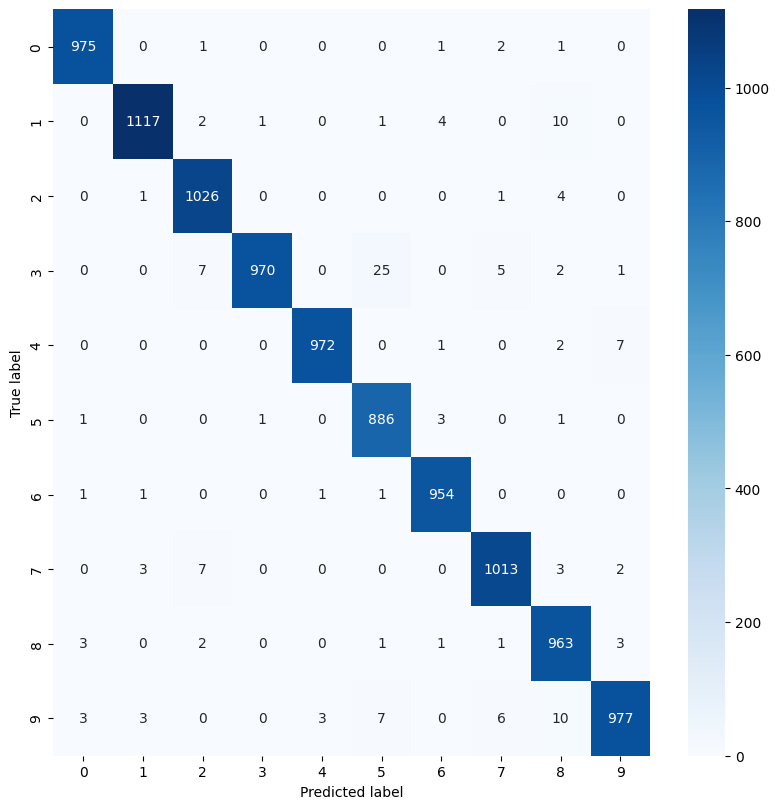

In [13]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,fmt="d", cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [15]:
from pprint import pprint
metrics_per_label = {}


total_pred = int(con_mat_df.to_numpy().sum())

for label in con_mat_df.index:
    metrics_per_label[label] = {
        "TP": 0, # values that where predicted correctly
        "FP": 0, # values that where predicted as label but are not
        "FN": 0, # values that where not predicted as label but are
        "TN": 0 # all predictions that where not label and was not label
    }

    metrics_per_label[label]["TP"] = int(con_mat_df.loc[label, label])
    metrics_per_label[label]["FP"] = int(con_mat_df.loc[:, label].sum())
    metrics_per_label[label]["FN"] = int(con_mat_df.loc[label, :].sum())
    metrics_per_label[label]["TN"]  = total_pred - (metrics_per_label[label]["TP"]  + metrics_per_label[label]["FP"] + metrics_per_label[label]["FN"])


for label in metrics_per_label:
    print(f"This is the metrics for label {label}:")
    print(f"True Positive = {metrics_per_label[label]['TP']}")
    print(f"False Positive = {metrics_per_label[label]['FP']}")
    print(f"True Negative = {metrics_per_label[label]['TN']}")
    print(f"False Negative = {metrics_per_label[label]['FN']}")
    print()



This is the metrics for label 0:
True Positive = 975
False Positive = 983
True Negative = 7062
False Negative = 980

This is the metrics for label 1:
True Positive = 1117
False Positive = 1125
True Negative = 6623
False Negative = 1135

This is the metrics for label 2:
True Positive = 1026
False Positive = 1045
True Negative = 6897
False Negative = 1032

This is the metrics for label 3:
True Positive = 970
False Positive = 972
True Negative = 7048
False Negative = 1010

This is the metrics for label 4:
True Positive = 972
False Positive = 976
True Negative = 7070
False Negative = 982

This is the metrics for label 5:
True Positive = 886
False Positive = 921
True Negative = 7301
False Negative = 892

This is the metrics for label 6:
True Positive = 954
False Positive = 964
True Negative = 7124
False Negative = 958

This is the metrics for label 7:
True Positive = 1013
False Positive = 1028
True Negative = 6931
False Negative = 1028

This is the metrics for label 8:
True Positive = 963
F